### 22 Dec

plan:

- move pykalman testing to a separate notebook ✅ (tests are probably not running)
- add support for batches ❔✅ (almost done missing predict)

in addition a bit fo refactoring of the code

### 26 Dec

- The filter using pykalman runs with no problem for 100k steps with basically everythign being a positive def matrix .... while the pytorch one somehow breaks after 100

### 27 Dec

- tested GPU support + batches on the model and is around 6 times faster 🎉
- the GPU utilizations ranges between 95% to 75% when the model is running without conditional predictions
- conditional predictions make the prediction time almost double
- got some weird issues with `nan` present in the covariance matrix when using float32, still need to investigate the root cause 

### 28 Dec

- working on analysis folder to see if and how the model can learn

### 29 Dec

- worked on getting predictions from the model and plotting them
- at the end gave up on using FastAI pipelines also for decoding, so I implemented a custom prediction. The only problem is that it doesn't support batches in prediction, but for now does the job and I already spent more than 1 day on it

### 30 Dec

- during morning finished predictions
- plotting of predictions
- fixed issue that obs_off where ignored during prediction
- fixed MINUS sign for loglikelihood
- fixed loss function that was using the data and not the prediction for the mean
- seems the model is learning

### 4 Jan

#### Meeting Fabian

- Current status
    - Model is learning sensible parameters!
    - conditional predictions
    - running on GPU with batches
    - pipeline for processing input data / visualization of results is ready
- Loss function
    - filter / only gap
    - sum / mean
- numerical stability
    - issue wtih pos definite
    - possible solution with forced symmetric
    - `float64` / sometimes even `nan` with `float32`
    - possibility use cholesky decomposition for inversion of matrices, but they need to be pos definite
- model improvements
    - have a bigger state
    - better init than random values
    - add **global meteo** as control 
    - model hyperparameters
        - batch size
        - n observation
        - block_len
        - add more gap_lens / variable missing
- next steps
    - make R diagonal and positive definite invert matrix using inversion lemma?
    - compute the joint distribution for the whole gap
    - write method section
    - add ERA-5 data

### 8 Jan

- finally added control input form ERA #4
- var_sel and gap_len are random generated #5
- adding metric support for gaps only
- gap_only loss is not working ..... there is a `~` missing 😱  so is computing for everything but the gap
- plus FastAi metrics just flatten everything messing up r2 for multivariate outputs

### 9 Jan

- proper support for multi var metrics and gap_only metrics
- training the a frist draft of the final model
    - using first general loss (not only for gap)
- seems there is an issue with `nan` if the gap is long, should test this properly

### 10 Jan

- if the n_dim_state is the double of the n_dim_obs there are issues with posdef


### 20 Jan

- the numerical issues (nan) are if you ran the model with gaps in all variables and for a long gap

### 27 Jan

- the filter now is much slower on a GPU even with big batches size. The GPU is fully utilizied but the overall time is still longer than CPU (both for standard and SR filter), which is weird. Should debug this more into detail, but it's not priority

### 31 Jan

trying to get train the model a lot and .... LinAlg errors
problably is due to overfitting to training data and covariances that are getting too small
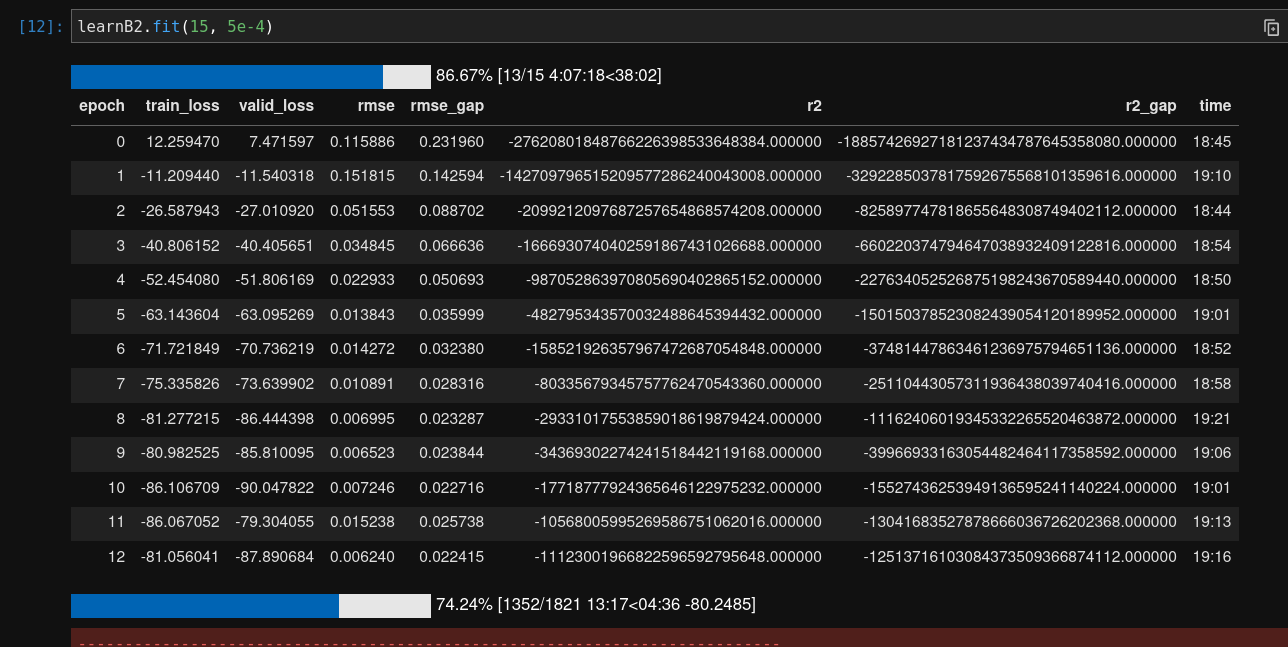
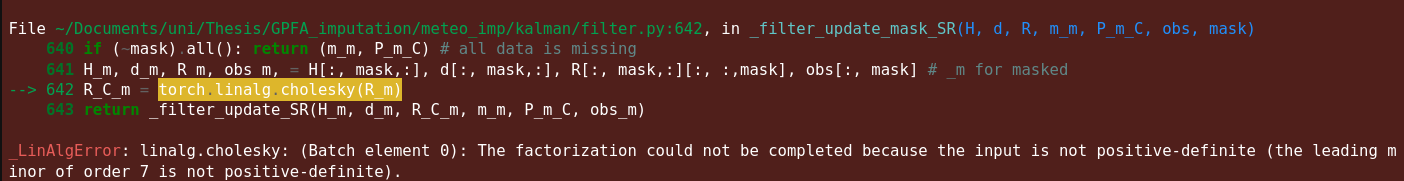


a conjecture is that the incorrect likelihood calculations are the source of the problem of the errors getting just very small

### 1 feb
goal:
- add min number to pos def constraint
- proper ll computation for the filter

### 2 Feb
- trained model with proper likelihood computations and now the uncertainties make sense!!!
- spent too much time in making `only_gap_ctx` but now it works amazingly well
- trying to debug why show results returns incorrect results when predicting only for gaps
- now prediction pipeline works properly
- working on deterministic validation set
- save learner after every batch

### 5 Feb
- After party day that the results of the models are working
- need to use loss to compare different versions of Kalman Filter

### 12 Feb
Finaly back to writing a journal ....
- finished to write the first (crude) draft of the introduction
- realized that if the gap is only in one variable there is no numerical stability issue and can have gaps up to 2 weeks
- model has a gap len in only one var with a len ranging form 12 to 336 (1 week) 
- added 2 new variables TS and SWC, so we have all variables that gap filled in FLUXNET and they are not in ERA + now there are 9 variables to the plots is going to be perfect  

### 21 Feb

- trying to figure out what is going wrong with the variable correlation and the model ... realized that the model is really not managing to handle the not working PCA for the control
- retraining with model initialized without PCA



## ideas: 

- for metrics can use NRMSE (Normalized RMSE) https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/
- standard error of the metrics

- The gap needs to be the middle (or at least in a specific position) of the block of data because the filter needs some time to actually get the correct state from the observations
- can optimize the code by not running the smoother till the beginning but only till the first gap

simple things to try:

- bigger state
- init with smart values
- add the ERA5 data

#### Numerical stability 

Statsmodels has a system to improve the numerical staility, by averaging the lower and the upper matrix after each filter iteraction. See https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.KalmanFilter.set_stability_method.html#statsmodels.tsa.statespace.kalman_filter.KalmanFilter.set_stability_method

> Set the numerical stability method

        The Kalman filter is a recursive algorithm that may in some cases
        suffer issues with numerical stability. The stability method controls
        what, if any, measures are taken to promote stability.

        Parameters
        ----------
        stability_method : int, optional
            Bitmask value to set the stability method to. See notes for
            details.
        **kwargs
            Keyword arguments may be used to influence the stability method by
            setting individual boolean flags. See notes for details.

        Notes
        -----
        The stability method is defined by a collection of boolean flags, and
        is internally stored as a bitmask. The methods available are:

        STABILITY_FORCE_SYMMETRY = 0x01
            If this flag is set, symmetry of the predicted state covariance
            matrix is enforced at each iteration of the filter, where each
            element is set to the average of the corresponding elements in the
            upper and lower triangle.

        If the bitmask is set directly via the `stability_method` argument,
        then the full method must be provided.

        If keyword arguments are used to set individual boolean flags, then
        the lowercase of the method must be used as an argument name, and the
        value is the desired value of the boolean flag (True or False).

        Note that the stability method may also be specified by directly
        modifying the class attributes which are defined similarly to the
        keyword arguments.

        The default stability method is `STABILITY_FORCE_SYMMETRY`

## Todos

### Long term

- open issue pytorch for check posdef code (symmetry is not always correct)
- PR for pykalman likelihood with missing data
- open issue fastcore that `ItemTransform` doesn't correctly dispatch on the tuple type
- issue documentation fastai
- `R2Score` metric in fastai flattens everything, which is a problem between batches and an bad idea for multivariate inputs
- `test_fail` not checking for none properly


https://docs.fast.ai/data.core.html#tfmdlists

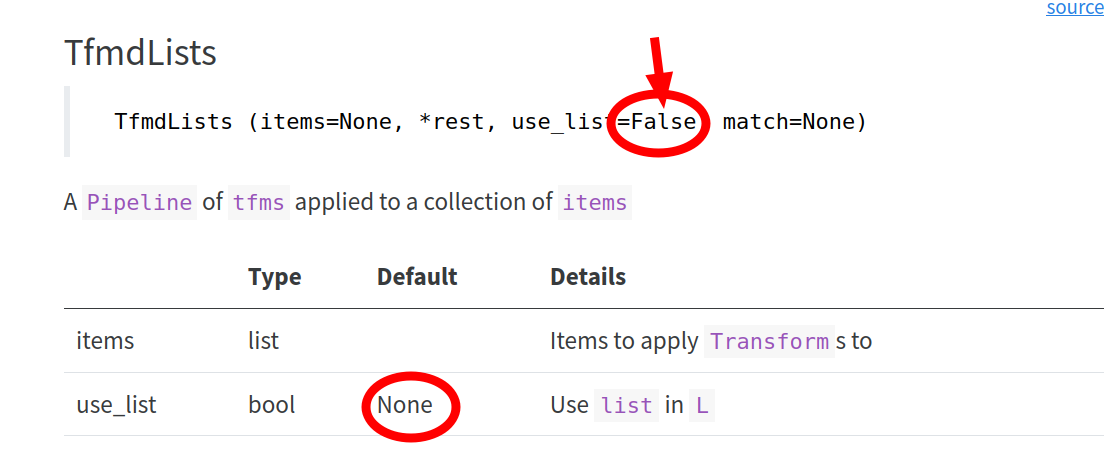

 - unpaywall bug for https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/qj.828 (link to wrong paper) report at support@unpaywall.org
 - `altair` support multiple `configure_*`